<p style="text-align: center">    
    
# <p style="text-align: center"> STATISTICS and LEARNING - CentraleSupélec </p>

## <p style="text-align: center"> TP - May 24th, 2021 </p>

## Context

The objective of this study is to estimate maize yield from climatic data. 

We will use for this purpose data from the National Agricultural Statistics Service of the United States Department of Agriculture (https://www.nass.usda.gov/Statistics_by_Subject/)



In [1]:
# preamble
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
np.random.seed(1)

## Data

We first load and visualize the dataset.

In [2]:
df = pd.read_csv('meteo.csv', index_col=0)
df.head()

,year,ID,y,TMIN97,TMIN98,TMIN99,TMIN100,TMIN101,TMIN102,TMIN103,...,ET292,ET293,ET294,ET295,ET296,ET297,ET298,ET299,ET300,ET301
0,2001,4003,1107,2.2,4.1,4.8,4.1,0.2,2.2,2.2,...,4.63,3.99,4.36,4.26,3.89,4.50,3.67,4.67,4.68,4.57
1,2002,4003,995,6.6,8.7,11.6,11.9,14.0,14.1,14.8,...,3.76,4.15,3.68,2.58,2.25,2.51,3.18,3.05,2.04,2.71
2,2003,4003,1020,3.8,6.6,8.2,8.9,9.4,9.8,11.7,...,5.00,4.90,4.90,5.08,4.86,3.92,4.20,4.32,3.73,3.73
3,2004,4003,935,6.8,9.0,8.3,8.8,9.4,6.6,4.9,...,3.77,3.65,4.21,3.36,3.32,3.33,3.11,0.70,1.80,2.22
4,2005,4003,1046,10.4,11.7,7.0,4.8,6.2,6.7,10.3,...,3.32,3.63,4.34,4.40,3.52,3.92,4.34,3.71,3.32,4.14


Each row gives for a year and a location ID (representing a US county) the average corn yield at county level and the corresponding climatic data across one cropping season. 

Let's take a closer look at the climatic variables.

In [3]:
df.describe()

,year,ID,y,TMIN97,TMIN98,TMIN99,TMIN100,TMIN101,TMIN102,TMIN103,...,ET292,ET293,ET294,ET295,ET296,ET297,ET298,ET299,ET300,ET301
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,...,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,2005.393056,28511.247222,979.306944,3.472500,1.442222,3.322917,6.420694,6.409167,3.984028,6.476389,...,2.949653,3.290625,2.378444,2.104736,2.548861,2.558111,2.619653,2.365611,2.664806,2.677694
std,2.849924,7282.933939,80.542279,6.652078,5.784514,4.922729,4.528817,4.900021,4.747661,5.922217,...,1.078230,1.387687,1.163954,1.226486,1.445047,1.294758,1.307471,1.192556,1.193431,1.142630
min,2001.000000,4003.000000,748.000000,-12.400000,-13.000000,-11.400000,-2.500000,-2.500000,-4.600000,-4.500000,...,0.800000,0.780000,0.200000,0.130000,0.120000,0.170000,0.790000,0.260000,0.190000,0.540000
25%,2003.000000,20198.000000,922.500000,-2.525000,-2.325000,0.700000,2.600000,2.500000,0.100000,0.900000,...,2.140000,2.220000,1.590000,1.150000,1.530000,1.585000,1.610000,1.720000,1.947500,1.970000
50%,2005.000000,31067.000000,981.000000,6.100000,0.300000,3.700000,5.600000,5.000000,4.300000,5.250000,...,2.540000,3.120000,2.160000,1.890000,2.620000,2.560000,2.435000,2.110000,2.460000,2.770000
75%,2008.000000,31137.000000,1034.000000,8.500000,6.500000,6.200000,10.700000,10.525000,7.400000,12.725000,...,3.762500,4.272500,3.090000,2.922500,3.440000,3.442500,3.330000,2.820000,3.440000,3.440000
max,2010.000000,48421.000000,1214.000000,13.900000,14.000000,14.400000,15.500000,18.400000,14.100000,16.600000,...,8.420000,8.690000,6.580000,7.000000,7.510000,6.030000,8.400000,6.070000,6.180000,7.000000


In [4]:
# We extract the labels (without the digits corresponding to the days of the years) from the climatic variables names
list_variables = np.unique([''.join([l for l in s if not l.isdigit()]) for s in list(df.columns[3:])])
print('The different environmental variables are : ' + ', '.join(list_variables))

The different environmental variables are : ET, P, RG, TMAX, TMIN


- ET stands for Evapo-transpiration https://en.wikipedia.org/wiki/Evapotranspiration
- P is the precipitation
- RG is the radiation 
- TMAX (resp. TMIN) is the max (resp. min) temperature recorded

The variables are recorded on days 97, 100, ..., 301 of the year, which corresponds to the period between sowing and harvest.

We can plot some time series to see their trends : 

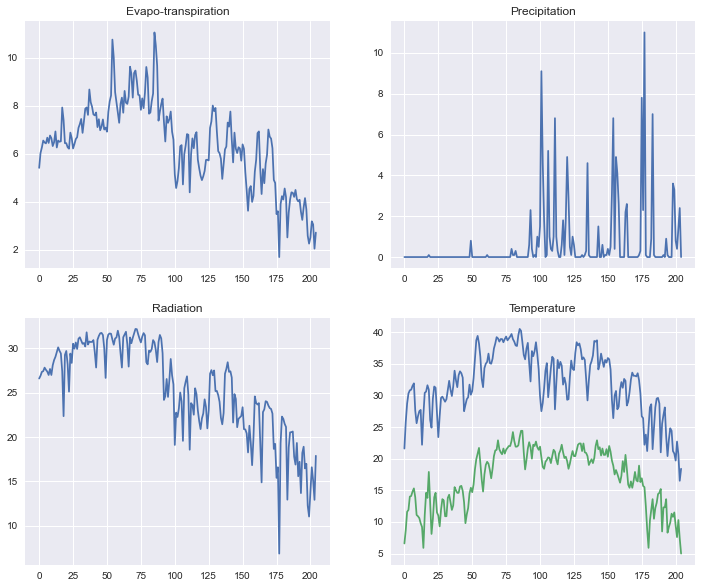

In [5]:
ID = 4003
year = 2002

dic_variable = {'ET': 'Evapo-transpiration', 'P': 'Precipitation', 'RG': 'Radiation', 'TMAX': 'Temperature'}

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs = axs.ravel()
for i in range(4): 
    axs[i].plot([df.loc[(df['year'] == year) & (df['ID'] == ID), key].values[0] 
                 for key in df.keys() if list_variables[i] in key])
    axs[i].set_title(dic_variable[list_variables[i]])
axs[3].plot([df.loc[(df['year'] == year) & (df['ID'] == ID), key].values[0] 
             for key in df.keys() if list_variables[4] in key])

The aim is to predict the yield of a crop w.r.t the record of these meteorological variables. 
We will address two different problems : 
- Can we tell the yield on an unvisited site ? 
- Can we infer the sites' geographic zone based on the meteorological records ? 

Let's start with the first problem : 

In [6]:
print('There are {} different sites'.format(df['ID'].nunique()))

There are 103 different sites


We select 10 random locations for the test set from the indices of the crop sites and build the train and test sets.
We use intermediate dataframes `df_train` and `df_test` for this purpose.


In [7]:
list_sites = df.ID.unique()
n_sites=len(list_sites)
sites_test = list_sites[np.random.randint(0, len(list_sites), 10)]
sites_train = [s for s in list_sites if s not in sites_test]
df_train = df.set_index('ID').loc[sites_train].reset_index()
df_test = df.set_index('ID').loc[sites_test].reset_index()

In [8]:
df_train.head()

,ID,year,y,TMIN97,TMIN98,TMIN99,TMIN100,TMIN101,TMIN102,TMIN103,...,ET292,ET293,ET294,ET295,ET296,ET297,ET298,ET299,ET300,ET301
0,4003,2001,1107,2.2,4.1,4.8,4.1,0.2,2.2,2.2,...,4.63,3.99,4.36,4.26,3.89,4.50,3.67,4.67,4.68,4.57
1,4003,2002,995,6.6,8.7,11.6,11.9,14.0,14.1,14.8,...,3.76,4.15,3.68,2.58,2.25,2.51,3.18,3.05,2.04,2.71
2,4003,2003,1020,3.8,6.6,8.2,8.9,9.4,9.8,11.7,...,5.00,4.90,4.90,5.08,4.86,3.92,4.20,4.32,3.73,3.73
3,4003,2004,935,6.8,9.0,8.3,8.8,9.4,6.6,4.9,...,3.77,3.65,4.21,3.36,3.32,3.33,3.11,0.70,1.80,2.22
4,4003,2005,1046,10.4,11.7,7.0,4.8,6.2,6.7,10.3,...,3.32,3.63,4.34,4.40,3.52,3.92,4.34,3.71,3.32,4.14


In [9]:
X_train = df_train[df_train.keys()[3:]].values
y_train = df_train['y'].values

X_test = df_test[df_test.keys()[3:]].values
y_test = df_test['y'].values

Let's look at the shape of our data : 

In [10]:
print('X_train shape : {}'.format(X_train.shape))
print('y_train shape : {}'.format(y_train.shape))
print('X_test shape : {}'.format(X_test.shape))
print('y_test shape : {}'.format(y_test.shape))
n_train = X_train.shape[0]
n_test = X_test.shape[0]

X_train shape : (639, 1025)
y_train shape : (639,)
X_test shape : (81, 1025)
y_test shape : (81,)


<font color='darkred'>    
    Question 1: First, normalize the data to obtain `X_train_n` and `X_test_n`. You could use `Standard Scaler` from ScikitLearn.
</font>

In [11]:
from sklearn.preprocessing import StandardScaler

## TO DO


## A baseline method for prediction 

<font color='darkred'>    
    Question 2: As a baseline for crop yield prediction in a specific year and a new location in the test set, compute the mean yield for this specific year in the training set and use it to approximate the yield in the test case. Compute the Mean Squared Error (MSE) in the test set.
</font>

In [12]:
# TO DO


## Linear Regression

<font color='darkred'>

Question 3: The first naive approach would be to make a LinearRegression model based on a all variables. Fit a Linear model by solving a Mean Squared Error problem. Then assess the performance of your model on the test data. 

Hint : 
you can either fit it 'by hand' or use the `sklearn.linear_models.LinearRegression` function.

What is the problem ? What could be possible solutions ?

</font>

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# TODO
###################

# build and fit the model

# predict 

# compute train and test errors

###################

#### Feature engineering

<font color='darkred'>

Question 4: In order to reduce overfitting, we can reduce the number of variables. For instance we can create a new dataset X_train_2 which consists of one feature per weather variable, representing the mean or sum over the recording period, or likewise the mean or sum of each climatic variable on $M=10$ periods across crop growth. Try to reduce the number of variables and check the new predictive performances of the model.
</font>

In [14]:
## Computation of the mean values of the climatic variables on the whole cropping season.
X_train_2 = pd.concat([df_train[[key for key in df_train.keys()
                                 if var in key]].mean(axis=1) 
                       for var in ['ET', 'P', 'RG', 'TMIN', 'TMAX']], axis=1).values

X_test_2 = pd.concat([df_test[[key for key in df_test.keys()
                               if var in key]].mean(axis=1) 
                       for var in ['ET', 'P', 'RG', 'TMIN', 'TMAX']], axis=1).values

In [15]:
## TO DO

#linear regression based on X_train_2 and computation of the test error

In [16]:
## Computation of the sum of the values of the climatic variables on M periods (M<<L, the total number of days)

dict_clim_var_train={}
dict_clim_var_test={}
#for var in ['ET', 'P', 'RG', 'TMIN', 'TMAX']:
for var in list_variables:
    dict_clim_var_train[var]=df_train[[key for key in df_train.keys() if var in key]].values    
    dict_clim_var_test[var]=df_test[[key for key in df_train.keys() if var in key]].values
len(dict_clim_var_train['ET'][0])

205

In [17]:
# A routine to compute the sum of a daily variable x in a M periods of equal length
def get_var_period(M,x,L):
    dt=L/M
    newx=np.zeros(M)
    for j in range(L):
        if int(j/dt)==int((j+1)/dt) or j==L-1:
            newx[int(j/dt)]+=x[j]
        else:
            newx[int(j/dt)]+=((int(j/dt)+1)*dt-j)*x[j]
            newx[int(j/dt)+1]+=(j+1-(int(j/dt)+1)*dt)*x[j]
    return newx
    

In [18]:
# Get the new variables of reduced dimension for $M$ periods, for both train and test sets
M=10
X_red_train=np.zeros([n_train,M*len(list_variables)])
X_red_test=np.zeros([n_test,M*len(list_variables)])
for i in range(n_train):
    for j in range(len(list_variables)):
        L=len(dict_clim_var_train[list_variables[j]][i])
        x_red_i=get_var_period(M,dict_clim_var_train[list_variables[j]][i],L)
        X_red_train[i,j*M:(j+1)*M]=x_red_i
for i in range(n_test):
    for j in range(len(list_variables)):
        L=len(dict_clim_var_test[list_variables[j]][i])
        x_red_i=get_var_period(M,dict_clim_var_test[list_variables[j]][i],L)
        X_red_test[i,j*M:(j+1)*M]=x_red_i
    

In [19]:
## TO DO 

#Linear model with these new variables

#computation of the test error


<font color='darkred'>

Question 5: We can also classically reduce overfitting by regularization, with Lasso or ridge penalties. 
Lasso helps moreover select a reduced number of variables. Test the predictive performances of the regularized models.

Hint: In order to select the proper hyperparameters, you can use `GridSearchCV` from ScikitLearn which implements cross-validation for a specified grid of hyperparams.
</font>

#### Feature selection with Lasso

The Lasso model needs an hyperparameter `alpha` to be set. In order to select the best value of `alpha`, we perform a cross validation on the training data, by using the `GridSearchCV` object from sklearn.

In [20]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': np.logspace(0, 2, 20)}

## TO DO

# set the grid search and train the grid of predictors

# plot the coefficients of the best estimator. How many features were selected ?

We have seen some basic models to learn the relationship between weather data and yield data. As it has been shown, these basic models can't explain perfectly the relationship very well. In this kind of situation, one can try more sophisticated models. For instance, we have time series data and our approach does not take into account the temporal aspect at all. Maybe the features are not informative enough, so trying to retrieve different data could be a better solution, but this can be difficult to achieve _a posteriori_

Let's try a non-linear models.

## Random Forest

<font color='darkred'>
   Question 6: Test the Random Forest method, with sklearn. Select `max_depth` and `n_estimators`by cross-validation. Evalaute the predictive performance of the model. You can try with the inital features or by grouping them on longer periods. 
    </font>

In [21]:
from sklearn.ensemble import RandomForestRegressor
## TO DO
list(df_train)

['ID',
 'year',
 'y',
 'TMIN97',
 'TMIN98',
 'TMIN99',
 'TMIN100',
 'TMIN101',
 'TMIN102',
 'TMIN103',
 'TMIN104',
 'TMIN105',
 'TMIN106',
 'TMIN107',
 'TMIN108',
 'TMIN109',
 'TMIN110',
 'TMIN111',
 'TMIN112',
 'TMIN113',
 'TMIN114',
 'TMIN115',
 'TMIN116',
 'TMIN117',
 'TMIN118',
 'TMIN119',
 'TMIN120',
 'TMIN121',
 'TMIN122',
 'TMIN123',
 'TMIN124',
 'TMIN125',
 'TMIN126',
 'TMIN127',
 'TMIN128',
 'TMIN129',
 'TMIN130',
 'TMIN131',
 'TMIN132',
 'TMIN133',
 'TMIN134',
 'TMIN135',
 'TMIN136',
 'TMIN137',
 'TMIN138',
 'TMIN139',
 'TMIN140',
 'TMIN141',
 'TMIN142',
 'TMIN143',
 'TMIN144',
 'TMIN145',
 'TMIN146',
 'TMIN147',
 'TMIN148',
 'TMIN149',
 'TMIN150',
 'TMIN151',
 'TMIN152',
 'TMIN153',
 'TMIN154',
 'TMIN155',
 'TMIN156',
 'TMIN157',
 'TMIN158',
 'TMIN159',
 'TMIN160',
 'TMIN161',
 'TMIN162',
 'TMIN163',
 'TMIN164',
 'TMIN165',
 'TMIN166',
 'TMIN167',
 'TMIN168',
 'TMIN169',
 'TMIN170',
 'TMIN171',
 'TMIN172',
 'TMIN173',
 'TMIN174',
 'TMIN175',
 'TMIN176',
 'TMIN177',
 'TMIN178

## Clustering of climatic data.

Our objective is now to cluster the weather data. These data come from crops which are located in the US, in different areas. 

We first reduce the dataset to keep only three distinct areas, which are well separated geographically : 

In [22]:
df['sID'] = df.ID.apply(lambda x: str(x) if x > 9999 else '0' + str(x))
df['dept'] = df.sID.apply(lambda x: x[:2])

df_cluster = df.set_index('dept').loc[['20', '31', '48']].reset_index()

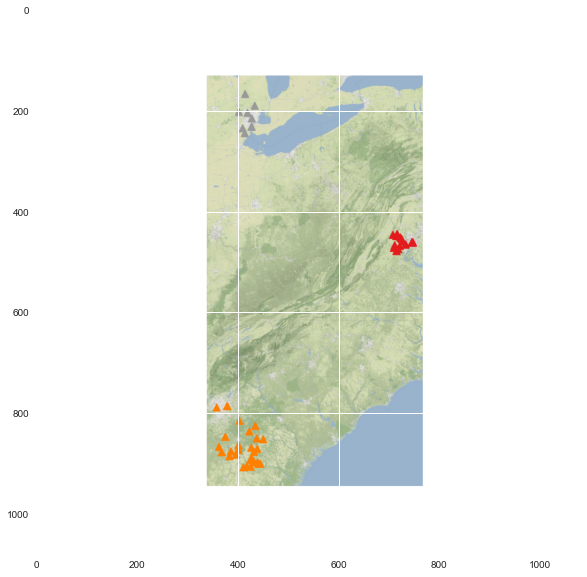

In [23]:
import matplotlib.image as mpimg
img = mpimg.imread('crops.png')
fig, ax = plt.subplots(figsize=(12, 10))
ax.imshow(img)

Can we retrieve these obvious classes from the weather data ? For instance if these geographic zones have very specific climates, by clustering the weather data with classical algorithms, one should retrieve groups which highlight these climates

In [24]:
# We identify the real clusters, based on the geograpic zones
X_cluster = df_cluster[[key for key in df_cluster.keys() 
                        if any([var in key for var in list_variables])]].values
dic_county = {'31': 0, '20': 1, '48': 2}
y_cluster = df_cluster['dept'].apply(lambda x: dic_county[x]).values

In [25]:
from sklearn.model_selection import train_test_split

We split these data into a training and a test set

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster,
                                                    test_size=0.2, random_state=0)

<font color='darkred'>
   Question 7: Cluster the different samples in the selected dataset based on the climatic variables. Use the KMEANS algorithm from sklearn. In each cluster, find the proportion of counties from the identified geographic zones. Did the clustering manage to retrieve the zones? From the yield prediction algorithm and this result, what do you infer ?
    </font>

In [27]:
from sklearn.cluster import KMeans

In [28]:
## TO DO
# compute the clusters for K=3
# compare the proportion of scenarios from each geaographic zone in each cluster.